- source code: [`kerasy.ML.decomposition`](https://github.com/iwasakishuto/Kerasy/blob/gh-pages/kerasy/ML/decomposition.py)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Data

In [3]:
from kerasy.datasets import mnist

In [4]:
seed = 0
Nimg_per_cls = 250

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
n_train, _, _ = x_train.shape
n_test,  _, _ = x_test.shape

In [7]:
x_train = x_train.reshape(n_train, -1)

In [8]:
# Chose Nimg_per_cls images for each class. 
idxes = np.concatenate([np.random.RandomState(seed).choice(np.where(y_train==cls)[0], Nimg_per_cls) for cls in np.unique(y_train)])

In [9]:
# Selected images and labels.
X = x_train[idxes]
Y = y_train[idxes]

In [10]:
X_normalized = X/255.

In [11]:
N, D = X.shape
print(f"Num of data    : {N}")
print(f"Num of features: {D}")

Num of data    : 2500
Num of features: 784


### Visualization

In [12]:
# The dimensions of how many 
n_components = 2

In [13]:
def plotMNIST(X, Y, n_samples=N, method="", ax=None):
    if ax is None: 
        fig,ax=plt.subplots()        
    """ Visualize the results. """
    for cls in np.unique(Y):
        idx = cls==Y
        ax.scatter(X[idx,0], X[idx,1], color=cm.jet(cls/10), s=20, label=cls)
    ax.legend(), ax.set_xlabel("Component 1", fontsize=14), ax.set_ylabel("Component 2", fontsize=14), ax.set_title(f"{method} (n_samples={n_samples})", fontsize=14)
    return ax

## PCA

In [14]:
from kerasy.ML.decomposition import PCA

In [15]:
model = PCA(n_components=n_components)

In [16]:
model.fit(X)

In [17]:
X_transformed = model.transform(X)

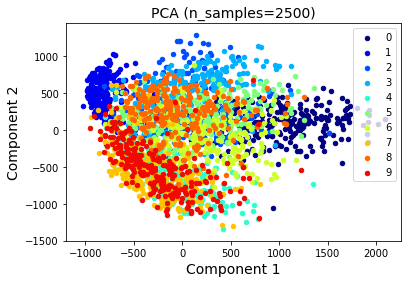

In [18]:
ax = plotMNIST(X_transformed, Y, method="PCA")
plt.show()

## kPCA

In [19]:
from kerasy.ML.decomposition import KernelPCA

In [20]:
model = KernelPCA(n_components=n_components, kernel="gaussian", sigma=10)

In [21]:
X_transformed = model.fit_transform(X_normalized)

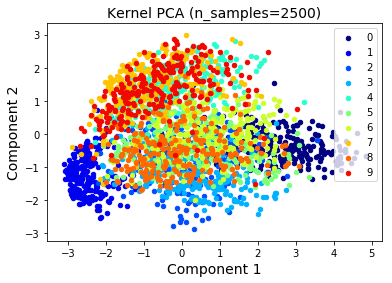

In [22]:
plotMNIST(X_transformed, Y, method="Kernel PCA")
plt.show()

## tSNE

In [23]:
from kerasy.ML.decomposition import tSNE

In [24]:
model = tSNE(
    initial_momentum=0.5,
    final_momoentum=0.8,
    eta=500, 
    random_state=seed
)

In [25]:
X_transformed = model.fit_transform(
    X, 
    n_components=n_components,
    initial_dims=50,
    perplexity=30.0,
    verbose=1,
    epochs=1000
)

Preprocessing the data using PCA to reduce the dimentions 784→50
Each conditional Gaussian has the same perplexity: 30.0
Mean value of sigma: 0.001
1000/1000 [####################] 100.00% - 369.851s  {'KL(P||Q)': 1.0799059306271543}

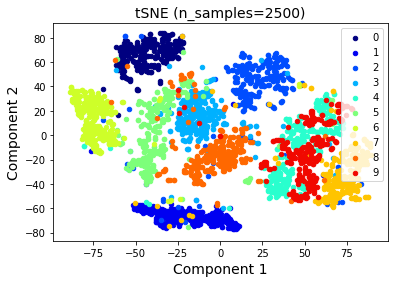

In [26]:
plotMNIST(X_transformed, Y, method="tSNE")
plt.show()

## UMAP

In [27]:
from kerasy.ML.decomposition import UMAP

In [28]:
model = UMAP(sigma_iter=20, sigma_tol=1e-5, sigma_lower=0, sigma_upper=1e3, random_state=seed)

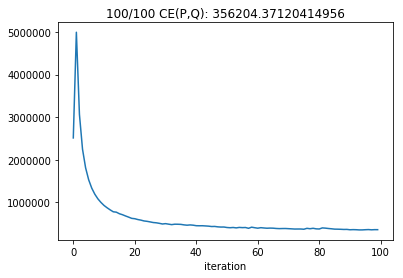

In [36]:
X_transformed = model.fit_transform(X, n_components=n_components, epochs=100, verbose=2)

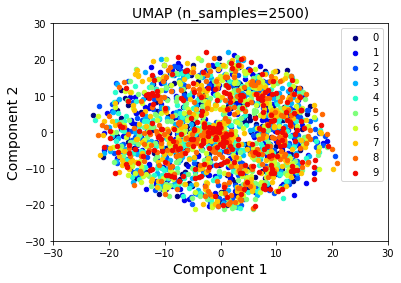

In [32]:
ax = plotMNIST(X_transformed, Y, method="UMAP")
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.show()